In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dengue_features = pd.read_csv('../data/dengue_features_train.csv')
dengue_labels = pd.read_csv('../data/dengue_labels_train.csv')


In [3]:
dengue_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
dengue_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


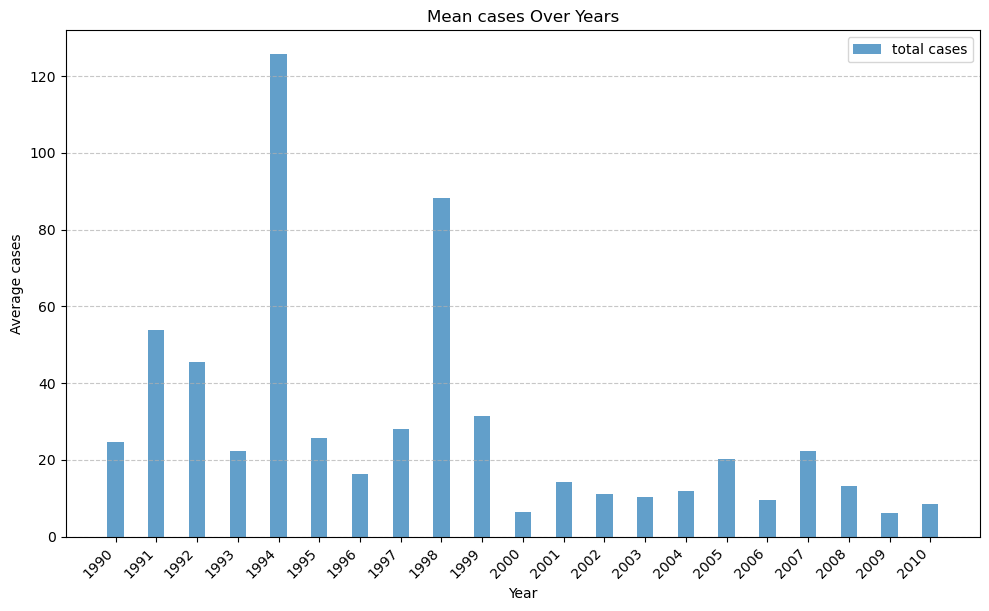

In [5]:
years = dengue_labels['year'].unique()
y = [dengue_labels[dengue_labels['year'] == year]['total_cases'].mean() for year in years]
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(years, y, width=0.4, label='total cases', alpha=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('Average cases')
ax.set_title('Mean cases Over Years')

ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(years)
ax.set_xticklabels(years.astype(int))
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
# converting kelvin to centigrade to analyse data efficiently
temperature_kelvin_columns = [i for i in dengue_features.columns if i.find('temp_k') > -1]

for i in temperature_kelvin_columns:
    dengue_features[i] = dengue_features[i] - 273.15

dengue_features.columns = [i.replace('temp_k', 'temp_c') for i in dengue_features.columns if i.find('temp_k')]
dengue_features.columns
dengue_features_original = dengue_features.copy()
dengue_labels_original = dengue_labels.copy()

In [7]:

merged_df = pd.merge(dengue_labels, dengue_features, on=['city','year', 'weekofyear'], how='inner')
merged_df.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


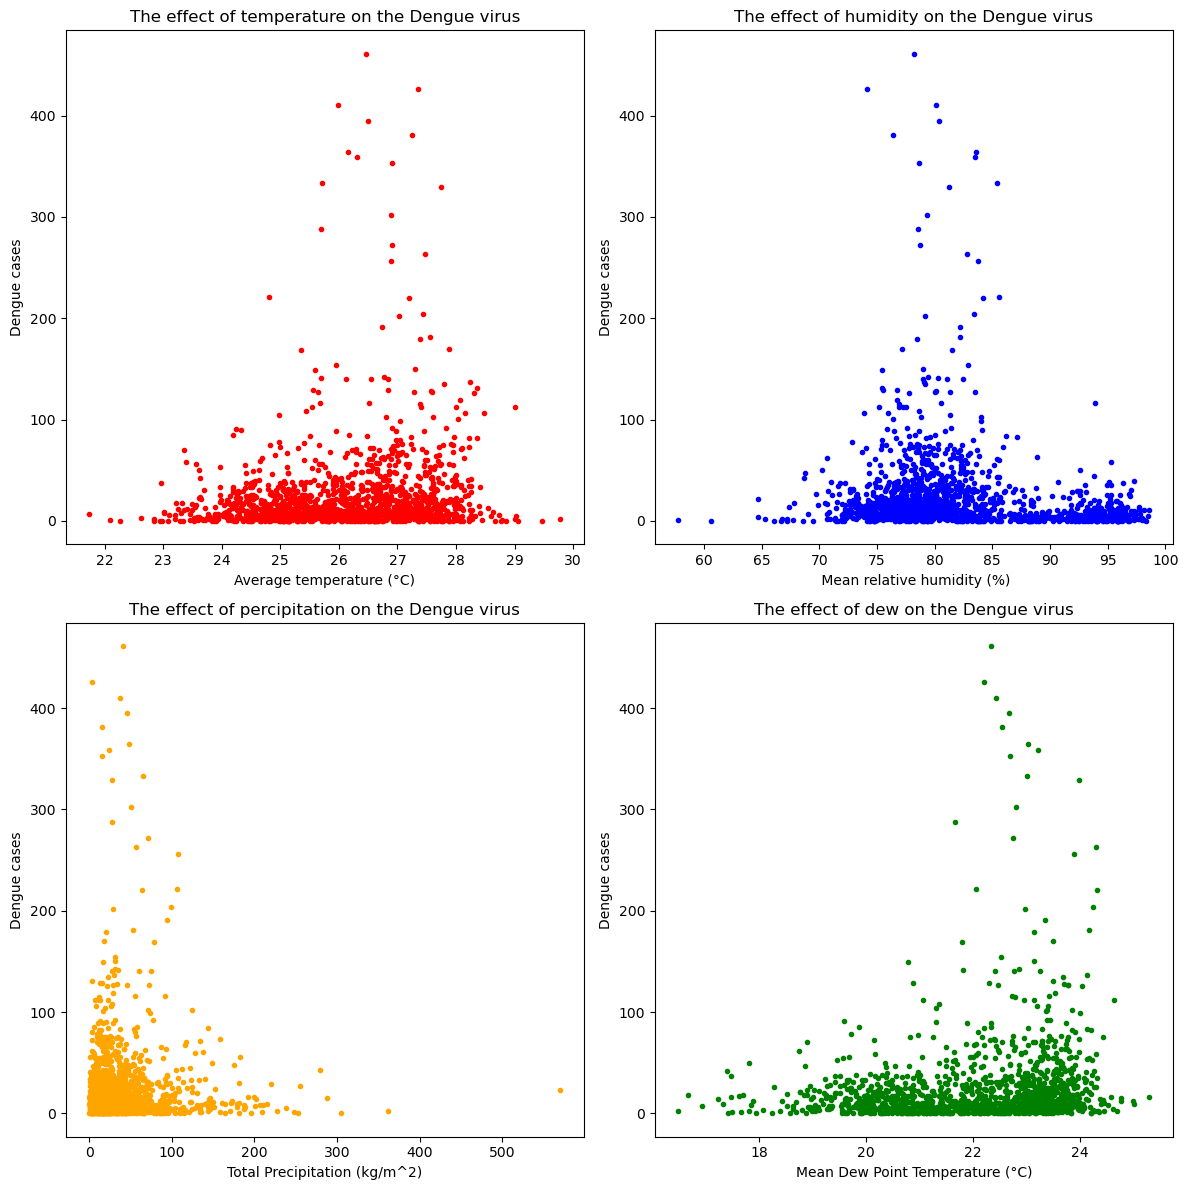

In [8]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.subplot(2,2,1)
y = merged_df['total_cases']
x = merged_df['reanalysis_avg_temp_c']
plt.title('The effect of temperature on the Dengue virus')
plt.ylabel('Dengue cases')
plt.xlabel('Average temperature (°C)')
plt.plot(x,y, marker='.', linestyle='none', color='red')

plt.subplot(2,2,2)
x = merged_df['reanalysis_relative_humidity_percent']
y = merged_df['total_cases']
plt.title('The effect of humidity on the Dengue virus')
plt.ylabel('Dengue cases')
plt.xlabel(' Mean relative humidity (%)')
plt.plot(x,y, marker='.', linestyle='none', color='blue')

plt.subplot(2,2,3)
x = merged_df['reanalysis_precip_amt_kg_per_m2']
y = merged_df['total_cases']
plt.title('The effect of percipitation on the Dengue virus')
plt.ylabel('Dengue cases')
plt.xlabel('Total Precipitation (kg/m^2)')
plt.plot(x,y, marker='.', linestyle='none', color='orange')

plt.subplot(2,2,4)
x = merged_df['reanalysis_dew_point_temp_c']
y = merged_df['total_cases']
plt.title('The effect of dew on the Dengue virus')
plt.ylabel('Dengue cases')
plt.xlabel('Mean Dew Point Temperature (°C)')
plt.plot(x,y, marker='.', linestyle='none', color='green')
plt.tight_layout()
plt.show()

In [9]:
mean_cases_with_optimum_temp = merged_df[(merged_df['reanalysis_avg_temp_c'] > 27) & (merged_df['reanalysis_avg_temp_c'] < 29)]
print('The mean total of cases with the temperature being at its optimal temperature:', mean_cases_with_optimum_temp['total_cases'].mean())

The mean total of cases with the temperature being at its optimal temperature: 31.94148936170213


In [10]:
dengue_features.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_c                     10
reanalysis_avg_temp_c                     10
reanalysis_dew_point_temp_c               10
reanalysis_max_air_temp_c                 10
reanalysis_min_air_temp_c                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [11]:
cols_with_nan_values = dengue_features.columns[dengue_features.isna().sum() > 0].tolist()

In [12]:
for col in cols_with_nan_values:
    print(col)
    dengue_features[col] = dengue_features[col].fillna(dengue_features[col].mean())
# Big improvement from doing this:
'''
for col in merged_df.columns[4:]:
    #print(col)
    meanOfRow = merged_df.loc[:,col].mean()
    #print("mean: ", meanOfRow)
    rowIndex = merged_df.columns.get_loc(col)
    for index, row in enumerate(merged_df[col]):
        if pd.isna(merged_df.iloc[index,rowIndex]):
            merged_df.iloc[index,rowIndex] = meanOfRow
'''


ndvi_ne
ndvi_nw
ndvi_se
ndvi_sw
precipitation_amt_mm
reanalysis_air_temp_c
reanalysis_avg_temp_c
reanalysis_dew_point_temp_c
reanalysis_max_air_temp_c
reanalysis_min_air_temp_c
reanalysis_precip_amt_kg_per_m2
reanalysis_relative_humidity_percent
reanalysis_sat_precip_amt_mm
reanalysis_specific_humidity_g_per_kg
reanalysis_tdtr_k
station_avg_temp_c
station_diur_temp_rng_c
station_max_temp_c
station_min_temp_c
station_precip_mm


'\nfor col in merged_df.columns[4:]:\n    #print(col)\n    meanOfRow = merged_df.loc[:,col].mean()\n    #print("mean: ", meanOfRow)\n    rowIndex = merged_df.columns.get_loc(col)\n    for index, row in enumerate(merged_df[col]):\n        if pd.isna(merged_df.iloc[index,rowIndex]):\n            merged_df.iloc[index,rowIndex] = meanOfRow\n'

In [13]:
# check if preprocessing worked
rows_with_missing_values = dengue_features[dengue_features.isna().any(axis=1)]
rows_with_missing_values.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm


In [14]:
dew_point = merged_df['reanalysis_dew_point_temp_c']
cases = merged_df['total_cases']

# Calculate the correlation coefficient
correlation = dew_point.corr(cases)
print("Correlation coefficient between dew point and Dengue cases:", correlation)

Correlation coefficient between dew point and Dengue cases: 0.14253051939880376


In [15]:
float_columns = dengue_features.select_dtypes(include='float64').columns
float_columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_c', 'reanalysis_avg_temp_c',
       'reanalysis_dew_point_temp_c', 'reanalysis_max_air_temp_c',
       'reanalysis_min_air_temp_c', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [16]:
dengue_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,24.422857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,25.061429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,25.631429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,25.837143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,26.368571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [17]:
from sklearn.preprocessing import OrdinalEncoder

categorical_feature = ["city"]

cities = merged_df[categorical_feature]
encoder = OrdinalEncoder()
encoded_cities = encoder.fit_transform(cities)
dengue_labels[categorical_feature] = encoded_cities
dengue_features[categorical_feature] = encoded_cities

In [18]:
merged_df = pd.merge(dengue_labels, dengue_features, on=['city','year', 'weekofyear'], how='inner')
merged_df.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1.0,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1.0,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1.0,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1.0,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1.0,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [19]:
X = dengue_labels.drop('total_cases',axis=1,errors='ignore')
y = dengue_labels['total_cases']

X.shape, y.shape

((1456, 3), (1456,))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor
# Best hyperparameters: {'n_estimators': 200, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1}
rfr = RandomForestRegressor(
                            n_estimators = 200,
                            max_depth = 14,
                            min_samples_split = 2,
                            min_samples_leaf = 1)

In [22]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=200)

In [23]:
rfr.feature_importances_

array([0.01463581, 0.58097073, 0.40439346])

In [24]:
y_pred = rfr.predict(X_test)
print(X_test)

      city  year  weekofyear
497    1.0  1999          46
1261   0.0  2006          39
411    1.0  1998          13
1046   0.0  2002          33
1033   0.0  2002          20
...    ...   ...         ...
477    1.0  1999          26
674    1.0  2003          16
1407   0.0  2009          30
649    1.0  2002          43
720    1.0  2004          10

[292 rows x 3 columns]


In [25]:

for i in range(len(X_test)):
    print(X_test.iloc[i][['year','weekofyear']].values)
    true_label = y_test.iloc[i]
    predicted_label = y_pred[i]
    print(f"True y: {true_label} Predicted y: {predicted_label}")

[1999.   46.]
True y: 43 Predicted y: 36.72166666666667
[2006.   39.]
True y: 6 Predicted y: 2.3505314546564544
[1998.   13.]
True y: 38 Predicted y: 31.29333333333333
[2002.   33.]
True y: 7 Predicted y: 6.336130952380952
[2002.   20.]
True y: 10 Predicted y: 6.995571428571429
[2002.    7.]
True y: 22 Predicted y: 15.103226911976913
[1994.   27.]
True y: 42 Predicted y: 46.895
[2005.   12.]
True y: 9 Predicted y: 10.417446428571429
[2005.   21.]
True y: 5 Predicted y: 4.994968820939409
[2007.   19.]
True y: 8 Predicted y: 9.86122520242915
[2003.   34.]
True y: 0 Predicted y: 0.03333333333333333
[2.002e+03 1.000e+00]
True y: 37 Predicted y: 33.91
[2002.   45.]
True y: 26 Predicted y: 24.6175
[2001.   12.]
True y: 8 Predicted y: 10.295964285714286
[2005.   47.]
True y: 22 Predicted y: 29.85
[2002.   19.]
True y: 22 Predicted y: 9.14307142857143
[1993.   29.]
True y: 16 Predicted y: 17.905
[2002.   30.]
True y: 5 Predicted y: 5.098422619047619
[2008.    8.]
True y: 8 Predicted y: 5.66
[1

In [26]:
from sklearn.metrics import r2_score

y_pred_new = np.round(y_pred).astype(int)
accuracy = r2_score(y_test.values, y_pred_new)
print(f"Model has an accuracy of : {accuracy}")
# If we include X labels such as 'ndvi_nw', 'ndvi_sw', 'station_precip_mm', we will get an r2 score of 0.6572839
# which is a big downgrade from our 0.8518725990425868 we got from 'city', 'year' and 'weekofyear'

Model has an accuracy of : 0.8395250928582623


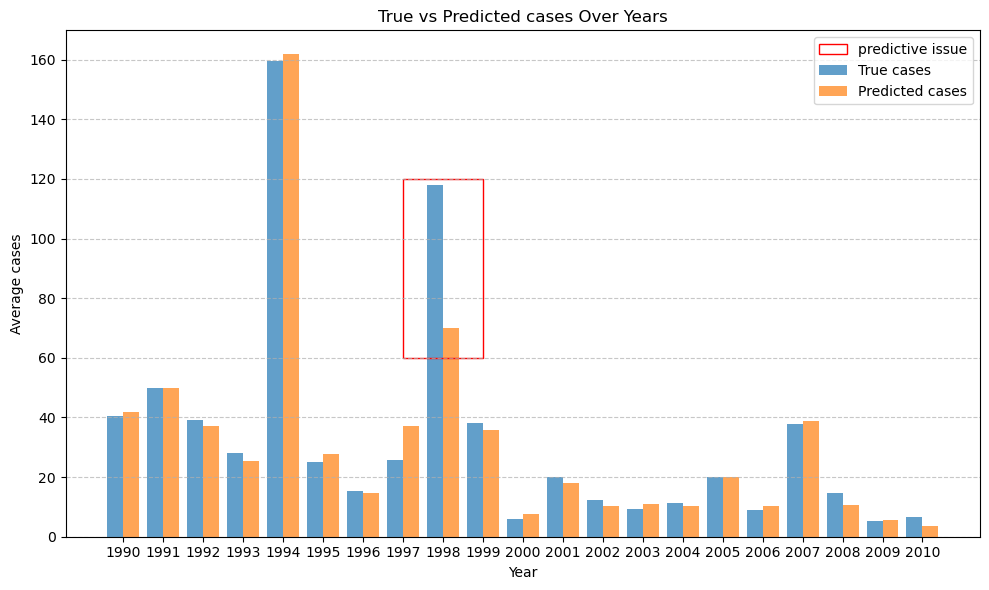

In [27]:
from matplotlib.patches import Rectangle
years = X_test['year'].unique()
true_labels = [y_test[X_test['year'] == year].mean() for year in years]
predicted_labels = [y_pred[X_test['year'] == year].mean() for year in years]
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(years - 0.2, true_labels, width=0.4, label='True cases', alpha=0.7)
ax.bar(years + 0.2, predicted_labels, width=0.4, label='Predicted cases', alpha=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('Average cases')
ax.set_title('True vs Predicted cases Over Years')



rect = Rectangle((1997, 60), 2,60 , edgecolor='red', facecolor='none', label='predictive issue')
plt.gca().add_patch(rect)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(years)
ax.set_xticklabels(years.astype(int))
plt.tight_layout()

plt.show()
# Issue with year 1998 predictions - must investigate 

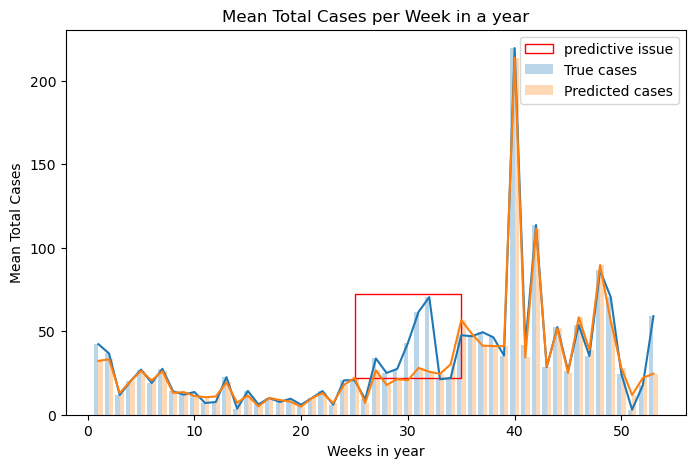

In [28]:
# plotting model accuracy by using the mean cases per week in each year 

all_cases = dengue_labels
plt.figure(figsize=(8,5))
weeks = sorted(X_test['weekofyear'].unique())
true_labels = [y_test[X_test['weekofyear'] == week].mean() for week in weeks]
predicted_labels = [y_pred[X_test['weekofyear'] == week].mean() for week in weeks]
weeks_minus_2 = [week-0.2 for week in weeks]
weeks_plus_2 = [week+0.2 for week in weeks]
plt.bar(weeks_minus_2, true_labels, width=0.4, label='True cases', alpha=0.3)
plt.bar(weeks_plus_2, predicted_labels, width=0.4, label='Predicted cases', alpha=0.3)
rect = Rectangle((25, 22), 10,50, edgecolor='red', facecolor='none', label='predictive issue')
plt.gca().add_patch(rect)
plt.plot(weeks, true_labels)
plt.plot(weeks, predicted_labels)
plt.legend()
plt.xlabel('Weeks in year')
plt.ylabel('Mean Total Cases')
plt.title('Mean Total Cases per Week in a year')
plt.show()
## as we can see there is an issue with predicting the cases of dengue around week 30

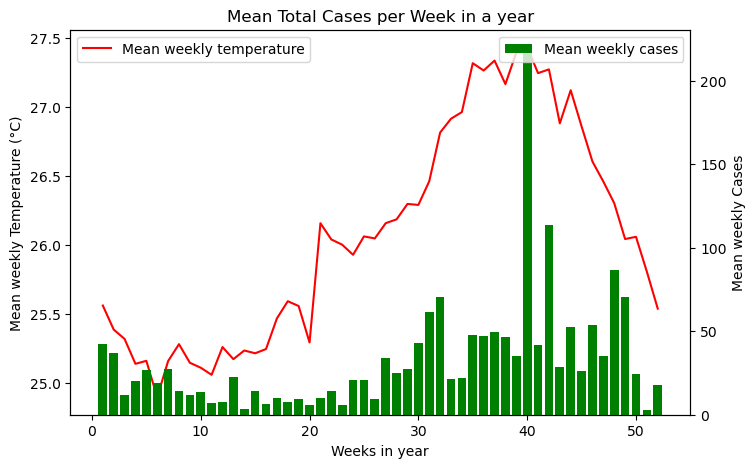

In [29]:
# Investigating the correlation between temperature and the number of dengue cases
plt.figure(figsize=(8,5))

weeks = sorted(X_test['weekofyear'].unique())
weeks = weeks[:52] # get rid of week 53 NAN
true_labels = [y_test[X_test['weekofyear'] == week].mean() for week in weeks]
predicted_labels = [y_pred[X_test['weekofyear'] == week].mean() for week in weeks]
temp_mean = dengue_features_original.groupby('weekofyear')['reanalysis_avg_temp_c'].mean()
temp_mean = temp_mean[:52]
plt.plot(weeks, temp_mean, color='red',label='Mean weekly temperature')
plt.ylabel('Mean weekly Temperature (°C)')
plt.legend(loc='upper left')
plt.xlabel('Weeks in year')

plt.twinx()

plt.bar(weeks, true_labels, color='green',label='Mean weekly cases')
plt.legend(loc='upper right')
plt.ylabel('Mean weekly Cases')

plt.title('Mean Total Cases per Week in a year')
plt.show()

In [30]:
# Generating global warming data for san juan
def generate_temperature_data(start_date, end_date, base_temperature, temperature_increase_rate):
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    num_days = len(date_range)
    noise_level = 2

    temperatures = base_temperature + np.arange(num_days) * temperature_increase_rate
    temperatures += np.random.normal(scale=noise_level, size=num_days)
    temperatures_celsius = (temperatures - 32) * (5/9)
    return pd.DataFrame({'Date': date_range, 'Temperature': temperatures_celsius})

start_date = '2025-01-01'
end_date = '2035-12-31'
base_temperature = 81
temperature_increase_rate = 0.36 / 365 # https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature

temperature_data = generate_temperature_data(start_date, end_date, base_temperature, temperature_increase_rate)
weekly_mean_temperatures = temperature_data.resample('W-SUN', on='Date').mean() # changing the daily values to weekly hence weekly Sunday(SUN)

weekly_mean_temperatures.to_csv('../data/san_juan_weekly_mean_temperatures_2025_to_2035.csv', index=True)

In [31]:
global_warming_data = pd.read_csv('../data/san_juan_weekly_mean_temperatures_2025_to_2035.csv')
global_warming_data.tail()

,Date,Temperature
570,2035-12-09,29.970748
571,2035-12-16,29.782153
572,2035-12-23,29.085755
573,2035-12-30,28.283386
574,2036-01-06,28.832354


In [32]:

X = dengue_features[['city','year','weekofyear','reanalysis_avg_temp_c']]
y = dengue_labels['total_cases']

X.shape, y.shape

((1456, 4), (1456,))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfr = RandomForestRegressor(
                            n_estimators = 200,
                            max_depth = 14,
                            min_samples_split = 2,
                            min_samples_leaf = 1)


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train['reanalysis_avg_temp_c'] = scaler.fit_transform(X_train[['reanalysis_avg_temp_c']])
X_train

,city,year,weekofyear,reanalysis_avg_temp_c
254,1.0,1995,11,0.272889
1063,0.0,2002,50,0.504889
636,1.0,2002,30,0.720000
1289,0.0,2007,16,0.398222
514,1.0,2000,11,0.193778
...,...,...,...,...
1095,0.0,2003,30,0.392000
1130,0.0,2004,13,0.411556
1294,0.0,2007,21,0.474667
860,1.0,2006,45,0.759111


In [35]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=200)

In [36]:
global_warming_data['Date'] = pd.to_datetime(global_warming_data['Date'])
global_warming_data['WeekOfYear'] = global_warming_data['Date'].dt.isocalendar().week
global_warming_data['Year'] = global_warming_data['Date'].dt.year

global_warming_data['Temperature'] = scaler.fit_transform(global_warming_data[['Temperature']])
predictions = np.zeros(len(global_warming_data))

for index, (date, temp, week, year) in global_warming_data.iterrows():
    y_predict = rfr.predict([[1.0, year, week, temp]])
    predictions[index] = y_predict

C:\Users\Niall\anaconda3\envs\DAML\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Niall\AppData\Local\Temp\ipykernel_47580\2026938258.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions[index] = y_predict
C:\Users\Niall\anaconda3\envs\DAML\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Niall\AppData\Local\Temp\ipykernel_47580\2026938258.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.

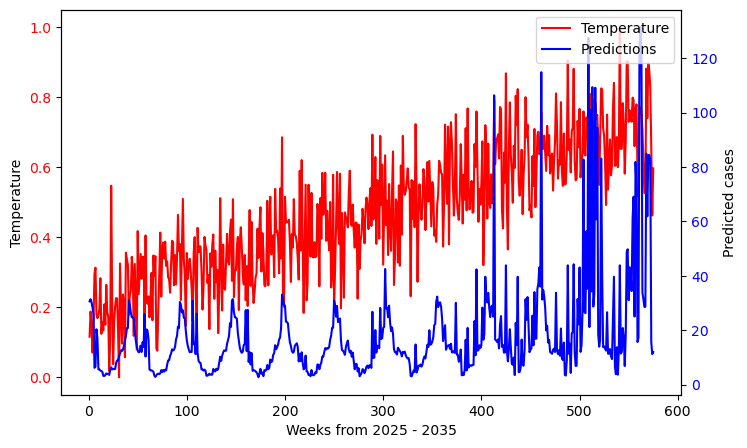

In [37]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(np.arange(1, 576), global_warming_data['Temperature'], color='red', label='Temperature')
ax1.set_ylabel('Temperature')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xlabel('Weeks from 2025 - 2035')
ax2 = ax1.twinx()
ax2.plot(np.arange(1, 576), predictions, color='blue', label='Predictions')
ax2.set_ylabel('Predicted cases')

ax2.tick_params(axis='y', labelcolor='blue')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()

In [38]:
y_pred = rfr.predict(X_test)
y_pred_new = np.round(y_pred).astype(int)
accuracy = r2_score(y_test.values, y_pred_new)
print(f"Model has an accuracy of : {accuracy}")

Model has an accuracy of : 0.6025157038033184


In [39]:
# Tuning the Random Forest Regression model
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 1000, step=50)
    max_depth = trial.suggest_int('max_depth', 2, 40)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    

    
    rfr = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  random_state=42)

    rfr.fit(X_train, y_train)


    y_pred = rfr.predict(X_test)
    y_pred_new = np.round(y_pred).astype(int)
    accuracy = r2_score(y_test.values, y_pred_new)

    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best hyperparameters:", study.best_params)

[I 2024-03-19 16:23:28,629] A new study created in memory with name: no-name-bebdae0b-53e0-4c44-a028-20cad1c55372
[I 2024-03-19 16:23:35,223] Trial 0 finished with value: 0.5531758201400363 and parameters: {'n_estimators': 700, 'max_depth': 18, 'min_samples_split': 16, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.5531758201400363.
[I 2024-03-19 16:23:35,706] Trial 1 finished with value: 0.3979966638794967 and parameters: {'n_estimators': 50, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.5531758201400363.
[I 2024-03-19 16:23:36,157] Trial 2 finished with value: 0.34770836713535536 and parameters: {'n_estimators': 50, 'max_depth': 32, 'min_samples_split': 13, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.5531758201400363.
[I 2024-03-19 16:23:37,716] Trial 3 finished with value: 0.3169366833284901 and parameters: {'n_estimators': 200, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 20}. Best is trial 0 with va

Best hyperparameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 4}
